In [10]:
#import the required libraries here
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from matplotlib.ticker import FuncFormatter

import pyfolio as pf

%matplotlib inline

In [11]:
tickers = ['FSLY','IMMR', 'FB', 'U','NVDA','AAPL', 'MSFT',"METV"]

start_date = '2021-07-01'
end_date = '2022-03-01'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
panel_data = panel_data.loc['2021-01-01' : '2021-12-31']
data = panel_data[['Close', 'Adj Close']]
data.head()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-06-30  59.599998  8.77  347.709991  109.830002  200.024994  136.960007   
2021-07-01  58.020000  8.49  354.390015  105.839996  202.119995  137.270004   
2021-07-02  56.470001  8.46  354.700012  106.089996  204.869995  139.960007   
2021-07-06  56.860001  8.22  352.779999  106.650002  206.985001  142.020004   
2021-07-07  54.369999  8.23  350.489990  104.489998  203.717499  144.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-06-30  270.899994  15.12  59.599998  8.77  347.709991  109.830002   
2021-07-01  271.600006  14.89  58.020000  8.49  354.390015  105.839996   
2021-07-02  277.649994  15.00  56.470001  8.46  354.700012  106.089996   
2021-07-06  277.660004  15.01  56.860001  8.22  352.779999  106.650002   
2021-07-07  279.929993  14.89  54.369999  8.23  350.489990  104.489998   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-06-30  199.931168  136.382050  269.331696  15.12  
2021-07-01  202.025208  136.690750  270.027649  14.89  
2021-07-02  204.773911  139.369400  276.042633  15.00  
2021-07-06  206.887924  141.420715  276.052582  15.01  
2021-07-07  203.621964  143.959946  278.309418  14.89

In [12]:
data.tail()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-12-27  37.750000  6.05  346.179993  148.009995  309.450012  180.330002   
2021-12-28  36.259998  5.87  346.220001  143.520004  303.220001  179.289993   
2021-12-29  35.090000  5.80  342.940002  144.550003  300.010010  179.380005   
2021-12-30  37.230000  5.85  344.359985  145.919998  295.859985  178.199997   
2021-12-31  35.450001  5.71  336.350006  142.990005  294.109985  177.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-12-27  342.450012  15.60  37.750000  6.05  346.179993  148.009995   
2021-12-28  341.250000  15.37  36.259998  5.87  346.220001  143.520004   
2021-12-29  341.950012  15.25  35.090000  5.80  342.940002  144.550003   
2021-12-30  339.320007  15.31  37.230000  5.85  344.359985  145.919998   
2021-12-31  336.320007  15.18  35.450001  5.71  336.350006  142.990005   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-12-27  309.397308  180.100540  341.743378  15.60  
2021-12-28  303.168335  179.061859  340.545837  15.37  
2021-12-29  299.958893  179.151749  341.244415  15.25  
2021-12-30  295.809601  177.973251  338.619843  15.31  
2021-12-31  294.059875  177.344055  335.626038  15.18

In [13]:
close_data = panel_data['Close']
adj_close_data = panel_data['Adj Close']

In [14]:
## Check for null values 
close_data.isnull().sum()
adj_close_data.isnull().sum()

Symbols
FSLY    0
IMMR    0
FB      0
U       0
NVDA    0
AAPL    0
MSFT    0
METV    0
dtype: int64

In [15]:
close_data.count()

Symbols
FSLY    129
IMMR    129
FB      129
U       129
NVDA    129
AAPL    129
MSFT    129
METV    129
dtype: int64

In [17]:
### Calculate the adj close returned series
return_series_adj = (adj_close_data.pct_change()+ 1).cumprod() - 1
return_series_adj.tail(1)*100

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-40.520131,-34.891679,-3.267086,30.192118,47.080557,30.034749,24.614386,0.396828


<AxesSubplot:xlabel='Date'>

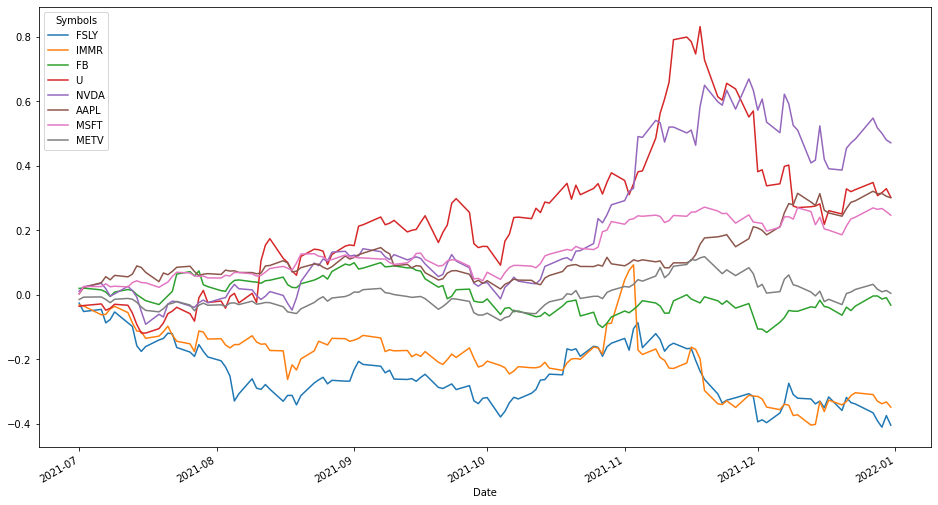

In [18]:
return_series_adj.plot(figsize=(16,9))

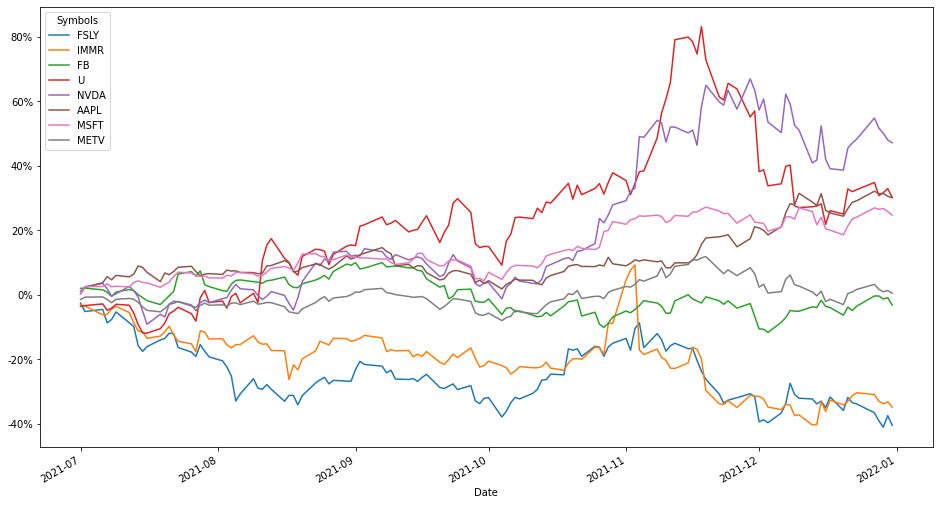

In [19]:
ax1 = return_series_adj.plot(figsize=(16,9))
#This sets the axis to percentage scale
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [20]:
### Check for annualised return 
annualized_return = (1+return_series_adj.tail(1))**(1/(1/2))-1
annualized_return

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-0.646215,-0.576091,-0.064274,0.694999,1.163269,0.690904,0.552875,0.007952


<AxesSubplot:xlabel='Date'>

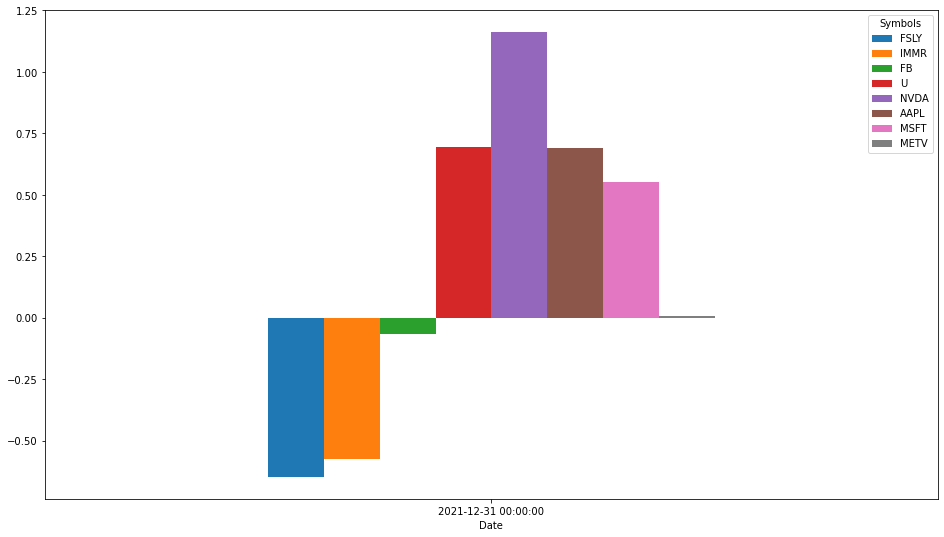

In [21]:
annualized_return.plot.bar(rot=0, figsize=(16,9))

C:\Users\SiYu\AppData\Local\Temp/ipykernel_10504/863718015.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -0.75, '-75.00%'),
 Text(0, -0.5, '-50.00%'),
 Text(0, -0.25, '-25.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.25, '25.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.75, '75.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 1.25, '125.00%'),
 Text(0, 1.5, '150.00%')]

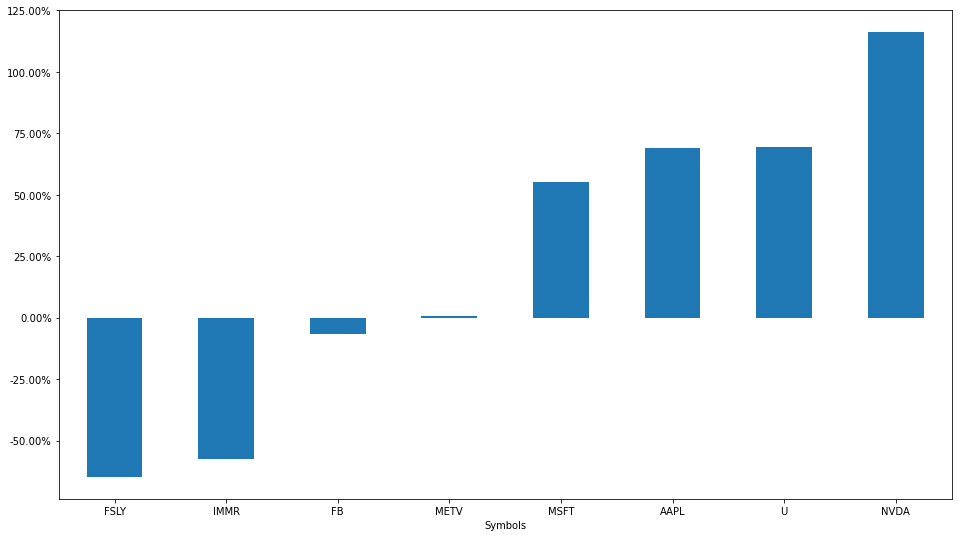

In [22]:
annualized_return = annualized_return.squeeze()
# annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))
type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [23]:
### Find Corr between these stocks
return_series_close = (close_data.pct_change()+ 1).cumprod() - 1
# return_series_close.plot(figsize=(16,9))
return_series_close.corr()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Symbols,,,,,,,,
FSLY,1.000000,0.758933,0.149105,-0.197366,-0.298011,-0.504765,-0.298211,0.109466
IMMR,0.758933,1.000000,0.373492,-0.442718,-0.605199,-0.706019,-0.552908,-0.222922
FB,0.149105,0.373492,1.000000,-0.422991,-0.486578,-0.259623,-0.459541,-0.182229
U,-0.197366,-0.442718,-0.422991,1.000000,0.823507,0.388195,0.838717,0.822390
NVDA,-0.298011,-0.605199,-0.486578,0.823507,1.000000,0.751314,0.945436,0.830791
AAPL,-0.504765,-0.706019,-0.259623,0.388195,0.751314,1.000000,0.742984,0.456147
MSFT,-0.298211,-0.552908,-0.459541,0.838717,0.945436,0.742984,1.000000,0.790530
METV,0.109466,-0.222922,-0.182229,0.822390,0.830791,0.456147,0.790530,1.000000


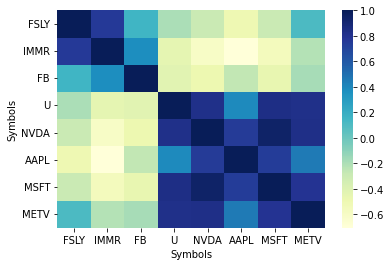

In [24]:
import seaborn as sns
dataplot = sns.heatmap(return_series_close.corr(), cmap="YlGnBu")

In [25]:
### Volatility
ahv = np.sqrt(np.log(close_data / close_data.shift(1)).var()) * np.sqrt(252)
ahv

Symbols
FSLY    0.603225
IMMR    0.670091
FB      0.285605
U       0.557605
NVDA    0.460791
AAPL    0.223441
MSFT    0.198213
METV    0.225692
dtype: float64

C:\Users\SiYu\AppData\Local\Temp/ipykernel_10504/3817654803.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, 0.0, '0.00%'),
 Text(0, 0.1, '10.00%'),
 Text(0, 0.2, '20.00%'),
 Text(0, 0.30000000000000004, '30.00%'),
 Text(0, 0.4, '40.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.6000000000000001, '60.00%'),
 Text(0, 0.7000000000000001, '70.00%'),
 Text(0, 0.8, '80.00%')]

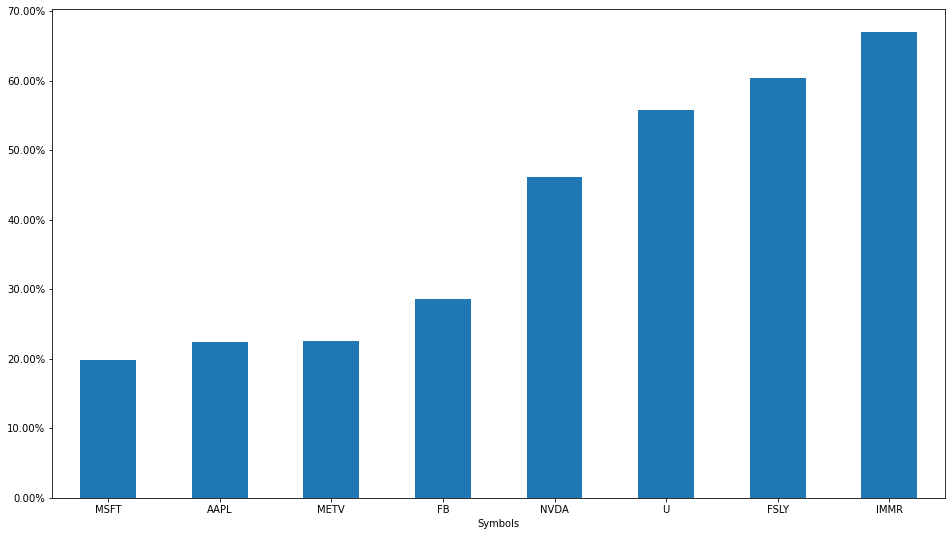

In [26]:
# ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))


# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [29]:
risk_free_ann_ret_rate = 0.01

returns_ts = adj_close_data.pct_change().dropna()
avg_daily_ret = returns_ts.mean()

returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252
avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

#Add the excess return columns for each ETF
returns_ts['Excess_ret_FSLY'] = returns_ts["FSLY"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_IMMR'] = returns_ts["IMMR"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_FB'] = returns_ts["FB"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_U'] = returns_ts["U"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_NVDA'] = returns_ts["NVDA"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_AAPL'] = returns_ts["AAPL"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_MSFT'] = returns_ts["MSFT"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_METV'] = returns_ts["METV"] - returns_ts['RiskFree_Rate']

In [31]:
#calculate sharpe ratio

sharpe_FSLY = ((avg_daily_ret['FSLY'] - avg_rf_ret) /returns_ts['Excess_ret_FSLY'].std())*np.sqrt(252)
print("Sharpe Ratio FSLY :\n", sharpe_FSLY.round(2))
sharpe_IMMR = ((avg_daily_ret['IMMR'] - avg_rf_ret) /returns_ts['Excess_ret_IMMR'].std())*np.sqrt(252)
print("Sharpe Ratio IMMR :\n" , sharpe_IMMR.round(2))
sharpe_FB = ((avg_daily_ret['FB'] - avg_rf_ret) /returns_ts['Excess_ret_FB'].std())*np.sqrt(252)
print("Sharpe Ratio FB :\n" , sharpe_FB.round(2))
sharpe_U = ((avg_daily_ret['U'] - avg_rf_ret) /returns_ts['Excess_ret_U'].std())*np.sqrt(252)
print("Sharpe Ratio U :\n", sharpe_U.round(2))
sharpe_NVDA = ((avg_daily_ret['NVDA'] - avg_rf_ret) /returns_ts['Excess_ret_NVDA'].std())*np.sqrt(252)
print("Sharpe Ratio NVDA :\n" , sharpe_NVDA.round(2))
sharpe_AAPL = ((avg_daily_ret['AAPL'] - avg_rf_ret) /returns_ts['Excess_ret_AAPL'].std())*np.sqrt(252)
print("Sharpe Ratio AAPL :\n" , sharpe_AAPL.round(2))
sharpe_MSFT = ((avg_daily_ret['MSFT'] - avg_rf_ret) /returns_ts['Excess_ret_MSFT'].std())*np.sqrt(252)
print("Sharpe Ratio MSFT :\n" , sharpe_MSFT.round(2))

sharpe_METV = ((avg_daily_ret['METV'] - avg_rf_ret) /returns_ts['Excess_ret_METV'].std())*np.sqrt(252)
print("Sharpe Ratio METV :\n" , sharpe_METV.round(2))

Sharpe Ratio FSLY :
 -1.42
Sharpe Ratio IMMR :
 -0.98
Sharpe Ratio FB :
 -0.12
Sharpe Ratio U :
 1.19
Sharpe Ratio NVDA :
 1.84
Sharpe Ratio AAPL :
 2.38
Sharpe Ratio MSFT :
 2.23
Sharpe Ratio METV :
 0.1


In [12]:
flattened_data = pd.read_csv('flattened_data.csv')

In [17]:
#Install panda profiling 
'''
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
'''

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [18]:
from pandas_profiling import ProfileReport
prof = ProfileReport(flattened_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
#Write to csv 
adj_close_data.to_csv("Adj_close.csv", sep=',', encoding='utf-8')

In [26]:
adj_close_prof = ProfileReport(adj_close_data)
adj_close_prof.to_file(output_file='Adj_close_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
import copy
TechIndicator = copy.deepcopy(data)

In [55]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [45]:
RSI=TechIndicator["Close"]
tech_list=RSI.columns.to_list()
tech_list

['FSLY', 'IMMR', 'FB', 'U', 'NVDA', 'AAPL', 'MSFT', 'METV']

In [46]:
RSI

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89
...,...,...,...,...,...,...,...,...
2021-12-27,37.750000,6.05,346.179993,148.009995,309.450012,180.330002,342.450012,15.60
2021-12-28,36.259998,5.87,346.220001,143.520004,303.220001,179.289993,341.250000,15.37
2021-12-29,35.090000,5.80,342.940002,144.550003,300.010010,179.380005,341.950012,15.25


In [57]:
for stock in tech_list:
    momentum_1D=stock+"|Momentum_1D"
    RSI_14D=stock+"|RSI_14D"
    RSI[momentum_1D] = (RSI[stock]-RSI[stock].shift(1)).fillna(0)
    RSI[RSI_14D] = RSI[momentum_1D].rolling(center=False, window=14).apply(rsi).fillna(0)

In [65]:
RSI.iloc[13,:]

Symbols
FSLY                 51.500000
IMMR                  7.760000
FB                  341.660004
U                   100.160004
NVDA                186.119995
AAPL                146.149994
MSFT                279.320007
METV                 14.460000
FSLY|Momentum_1D      0.290001
IMMR|Momentum_1D      0.120000
FB|Momentum_1D        4.709991
U|Momentum_1D         1.930000
NVDA|Momentum_1D     -1.677505
AAPL|Momentum_1D      3.699997
MSFT|Momentum_1D      2.309998
METV|Momentum_1D      0.150000
FSLY|RSI_14D         30.297856
IMMR|RSI_14D         31.599220
FB|RSI_14D           54.889654
U|RSI_14D            31.518035
NVDA|RSI_14D         40.380385
AAPL|RSI_14D         56.327777
MSFT|RSI_14D         55.253151
METV|RSI_14D         39.957475
Name: 2021-07-20 00:00:00, dtype: float64